# Compare MWAS methods for sanity tests and troubleshooting

In version e, we unify the elastic.net functions and make sure 1se and 1min produce different results.

In version f, we try old covariates with all new data for everything else

In version g, we do another quick sanity test with "all" sample methylation data instead of AA.

In version h, we try old covariates, new BSseq data, new everything else. Since we're using old BSseq data, we must change back to Chr 7 for the selected peak for which we have sample data. We got normal results!

In version i, change back to Chr 1 and see if we still get normal results.... We did not!

Ok, now let's try other chromosomes/regions with random sites

Down the road, let's change covariates back to ours

In [1]:
chr <- 3 # code set up for old bsseq chr 7, or anything with new bsseq

In [2]:
sites_to_test_pos <- "random"
n_samples <- 200

In [3]:
# # Chr 1 sites
# sites_to_test_pos <- c(73274305, 73274312, 73292330, 73307769, 73308571, 73419188, 73419830, 73420076)

In [4]:
# # These are the same sites from our test BSsample object on chr 7, and we're extracting these sites from
# # the new bsseq object for the whole chromosome.
# sites_to_test_pos <-
# c(1980077, 1980101, 1980129, 1980136, 1980145, 1980179, 1980183, 1980193, 1980205, 1980239, 
# 1980247, 1980287, 1980291, 1980303, 1980320, 1980326, 1980355, 1980373, 1980390, 1980396, 
# 1980424, 1980430, 1980448, 1980458, 1980464, 1980496, 1980577, 1980581, 1980642, 1980661, 
# 1980787, 1980833, 1980852, 1980860, 1980866, 1980869, 1980893, 1980896, 1980905, 1980933, 
# 1980948, 1980952, 1980997, 1981035, 1981057, 1981111, 1981113, 1981123, 1981186, 1981200, 
# 1981213, 1981219, 1981246, 1981253, 1981262, 1981286, 1981328, 1981352, 1981359, 1981386, 
# 1981410, 1981427, 1981449, 1981479, 1981518, 1981608, 1981613, 1981675, 1981682, 1981958, 
# 1982004, 1982017, 1982035, 1982064, 1982079, 1982246, 1982264, 1982311, 1982357, 1982397, 
# 1982428, 1982488, 1982495, 1982498, 1982500, 1982541, 1982564, 1982583, 1982587, 1982648, 
# 1982740, 1982933, 1983048, 1983077, 1983083, 1983085, 1983105, 1983115, 1983133, 1983135, 
# 1983137, 1983139, 1983141, 1983143, 1983145, 1983147, 1983149, 1983151, 1983153, 1983296, 
# 1983405, 1983484, 1983612, 1983632, 1983694, 1983703, 1983733, 1983747, 1984150, 1984336, 
# 1984422, 1984473, 1984518, 1984556, 1984603, 1984623, 1984705, 1984833, 1984895, 1984908, 
# 1984972, 1985070, 1985172, 1985187, 1985193, 1985231, 1985257, 1985261, 1985292, 1985304, 
# 1985311, 1985342, 1985365, 1985419, 1985445, 1985468, 1985486, 1985521, 1985572, 1985585, 
# 1985591, 1985721, 1985744, 1985751, 1985759, 1985767, 1985825, 1985848, 1985857, 1985872, 
# 1985878, 1985883, 1985906, 1985911, 1985971, 1986087, 1986093, 1986164, 1986194, 1986214, 
# 1986256, 1986268, 1986331, 1986354, 1986377, 1986395, 1986407, 1986410, 1986417, 1986424, 
# 1986443, 1986450, 1986462, 1986465, 1986484, 1986486, 1986495, 1986497, 1986500, 1986519, 
# 1986521, 1986530, 1986532, 1986535, 1986554, 1986556, 1986583, 1986603, 1986624, 1986652, 
# 1986733, 1986784, 1986909, 1986957, 1987071, 1987106, 1987187, 1987226, 1987253, 1987269, 
# 1987319, 1987330, 1987338, 1987363, 1987365, 1987388, 1987395, 1987403, 1987407, 1987413, 
# 1987418, 1987434, 1987449, 1987458, 1987468, 1987492, 1987511, 1987527, 1987565, 1987604, 
# 1987616, 1987627, 1987648, 1987656, 1987659, 1987665, 1987669, 1987680, 1987684, 1987688, 
# 1987697, 1987705, 1987719, 1987725, 1987732, 1987778, 1987797, 1987808, 1987853, 1987858, 
# 1987861, 1987896, 1987910, 1987930, 1988010, 1988039, 1988059, 1988066, 1988078, 1988129, 
# 1988133, 1988141, 1988171, 1988201, 1988216, 1988292, 1988307, 1988321, 1988325, 1988332, 
# 1988401, 1988423, 1988546, 1988580, 1988612, 1988630, 1988634, 1988636, 1988655, 1988662, 
# 1988680, 1988708, 1988718, 1988745, 1988748, 1988776, 1988785, 1988847, 1988874, 1989119, 
# 1989169, 1989183, 1989201, 1989209, 1989218, 1989223, 1989241, 1989249, 1989258, 1989263, 
# 1989275, 1989298, 1989308, 1989332, 1989394, 1989442, 1989451, 1989482, 1989497, 1989500, 
# 1989503, 1989510, 1989527, 1989534, 1989550, 1989605, 1989607, 1989617, 1989622, 1989628, 
# 1989642, 1989658, 1989674, 1989690, 1989754, 1989761, 1989767, 1989793, 1989924, 1989957)

In [5]:
filter_snps <- FALSE # speed things up by pre-filtering whole chromosomes to desired regions

## Be ready with matched up SNP and covariate files

In [6]:
library("glmnet")
library("e1071")
library("doParallel")
library("data.table")

Loading required package: Matrix

Loaded glmnet 4.1-8

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



In [7]:
df <- fread("09-OUT_matched_SNP_meth_cov_a2.csv")

In [8]:
df <- df[which(df$Chr == chr), ]

In [9]:
df <- df[which(df$population == "all"), ]
df <- df[which(df$brain_region == "caud"), ]

In [10]:
df

Chr,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,first_meth_index_with_SNP_coverage,subpopulation,brain_region,population,region,cov_file,cov_file2,cov_file3,cov_file4
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,/expanse/lustre/projects/jhu152/naglemi/mwas/gwas//libd_chr3.pgen,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr3_all.rda,198099789,11602,1538467,1,all,caud,all,caud,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth-no-dx.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-dx.csv


In [11]:
i <- 1

In [12]:
df[1, ]

Chr,SNP_data,methylation_data,last_meth_value_with_SNP_coverage,first_meth_value_with_SNP_coverage,last_meth_index_with_SNP_coverage,first_meth_index_with_SNP_coverage,subpopulation,brain_region,population,region,cov_file,cov_file2,cov_file3,cov_file4
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3,/expanse/lustre/projects/jhu152/naglemi/mwas/gwas//libd_chr3.pgen,/expanse/lustre/projects/jhu152/naglemi/mwas/pheno/caud/out/chr3_all.rda,198099789,11602,1538467,1,all,caud,all,caud,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-meth-no-dx.csv,/expanse/lustre/projects/jhu152/naglemi/mwas/full_covariates_a2/all_caud-no-dx.csv


In [13]:
set.seed(2018)
wind <- c(10000)
# output directory
#outd <- "/dcl02/lieber/shan/shizhong/finemapping/GWAS/tags/scz3/mwas/chr22/1/"
outd <- "20-OUT_original_mwas_sanity_test/"

## Functions

### Shizhong's original

In [14]:
###### model: learn elastic net model on training data 
######---------Input: trainX, trainY
######---------Return: selected features and coefficents

# original
# elastic.net <- function(trainX,trainY){
#     if(nrow(trainX)!=length(trainY)){
#             stop("Number of observations is differerent")
#     } 

#     # optimize alpha---mixing parameter  
#     a <- 0.5
#     search <- foreach(ai = a, .combine = rbind) %dopar% {
#         cv.fit <- cv.glmnet(
#                         trainX,
#                         trainY,
#                         nfold = 5,
#                         type.measure = "mse",
#                         paralle = TRUE,
#                         alpha = ai
#                         )
#         data.frame(
#                         cvm = min(cv.fit$cvm),
#                         lambda = cv.fit$lambda.min,
#                         alpha = ai
#                         )
#         } 
#     cv.opt <- search[search$cvm == min(search$cvm),] 

#         # fit model by optimized alpha and lambda
#         yfit = glmnet(
#         trainX,
#         trainY,
#         lambda = cv.opt$lambda,
#         alpha = cv.opt$alpha
#                 )       
#         idf <- coef(yfit)
#         idx <- which(idf != 0)
#         selectf <- data.frame(
#                 features = idf@Dimnames[[1]][idx], 
#                 coefs = idf [idx]
#         )
# }

MWAS <- function(gwas, weight, geno){
        z <- gwas %*% weight
        z.cor <- cor(geno)
        se <- sqrt(weight %*%  z.cor %*%  weight)
        z <- z/se
        p=pnorm(abs(z),lower.tail=F)*2
        return(c(z, p))
}

#### Modified `elastic.net` to use `lambda.1se`

In [15]:
# modified to use lambda 1se and appropriate cvm
elastic.net <- function(trainX,trainY, lambda.choice = "1se"){
    if(nrow(trainX)!=length(trainY)){
            stop("Number of observations is differerent")
    } 

    # optimize alpha---mixing parameter  
    a <- 0.5
    search <- foreach(ai = a, .combine = rbind) %dopar% {
        #set.seed(42)
        cv.fit <- cv.glmnet(
                        trainX,
                        trainY,
                        nfold = 5,
                        type.measure = "mse",
                        parallel = TRUE,
                        alpha = ai
                        )
        #print(paste0("Dim of trainX: ", dim(trainX)))
        #print(paste0("Len of trainY: ", length(trainY)))
        coef_matrix <- as.matrix(coef(cv.fit))

        if(lambda.choice == "1se"){
            chosen_lambda <- cv.fit$lambda.1se
            chosen_cvm <- cv.fit$cvm[cv.fit$lambda == cv.fit$lambda.1se]
        }
        if(lambda.choice == "min"){
            chosen_lambda <- cv.fit$lambda.min
            chosen_cvm <- min(cv.fit$cvm)
        }


        data.frame(
                        cvm = chosen_cvm,
                        lambda = chosen_lambda,
                        alpha = ai
                        )
        } 
    cv.opt <- search[search$cvm == min(search$cvm),] 

        # fit model by optimized alpha and lambda
    #set.seed(42)
    yfit <- glmnet(
    trainX,
    trainY,
    lambda = cv.opt$lambda,
    alpha = cv.opt$alpha)

    idf <- coef(yfit)
    idx <- which(idf != 0)
    selectf <- data.frame(
            features = idf@Dimnames[[1]][idx], 
            coefs = idf [idx]
    )
}

## Replace all old objects with new objects in same format

### Methylation data

In [16]:
suppressWarnings(library(bsseq))

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:data.table’:

    first, second


The following objects are masked from ‘package:Matrix’:

    expand, unname


The following object is masked from ‘package:utils’:

    findMatches


The

In [17]:
# # The code in this block is for NEW methylation data, which can be for any chromosome or portion

# # load data for mwas
# # load("./rda/caudate_mwas_data_chr22.rda")
load(df$methylation_data[i])

p <- getMeth(BSobj2)


rownames(p) <- start(BSobj2)

sites_to_test_pos <- sample(start(BSobj2), n_samples)

sites_to_test <- which(start(BSobj2) %in% sites_to_test_pos)
p <- p[sites_to_test, ]
cg <- as.numeric(rownames(p))

Subset our p object to the same sites as the old one, compare values

In [18]:
# # Old dataset
# load("BSsample.rda", verbose = TRUE) # we get the @colData attribute as a data.frame here
# load("p1.rda", verbose = TRUE) # and the p matrix from getMeth() here

# BSobj2 <- BSsample
# cg <- as.numeric(rownames(p)) # This line same whether we use old or new version
# sites_to_test_pos <- cg

### covariates

In [19]:
# The code in this block is for NEW covariate data

# covs <- fread(df$cov_file[i])
# covs <- t(covs)
# colnames(covs) <- covs[1, ]
# covs <- covs[2:nrow(covs), ]
# # transpose so we have same orientation as original code

In [20]:
# This is the OLD covariate data

load("covs_for_meqtl.rda")

### Regress methylation data over covariates

In [21]:
BSobj2$brnum <- gsub("Br0", "Br", BSobj2$brnum)
colnames(covs) <- gsub("Br0", "Br", colnames(covs))

In [22]:
mat <- match(BSobj2$brnum,colnames(covs)) 
covs <- t(covs[,mat])
p.residual=matrix(NA,dim(p)[1],dim(p)[2])

In [23]:
# This is something we only need to do for new covariates
if("genoPC1" %in% colnames(covs)){
    rownames(covs)[is.na(covs[, 'genoPC1'])] <- BSobj2$brnum[is.na(covs[, 'genoPC1'])]
}

In [24]:
colnames(p.residual) <- BSobj2$brnum

In [25]:
covs <- as.data.frame(covs)
# Convert all columns except Dx and Sex from character to numeric
cols_to_convert <- setdiff(names(covs), c("Dx", "Sex"))

for (col in cols_to_convert) {
  covs[[col]] <- as.numeric(covs[[col]])
}

# Print the modified data frame to check the conversion
#print(dat)


In [26]:
for (i in 1:dim(p)[1]) { # For each methylation site
    dat <- as.data.frame(cbind(y = p[i,], covs))
    
    # Check for rows with NAs (the ones for which we don't have covariate data)
    valid_rows <- complete.cases(dat)
    
    if (sum(valid_rows) > 0) {
        dat_valid <- dat[valid_rows,]
        model.res <- lm(y ~ ., data = dat_valid)
        
        # Store residuals in the corresponding positions
        p.residual[i, valid_rows] <- resid(model.res)
    }
}


# for(i in 1:dim(p)[1]){ # foro each methylation site
#         dat <- as.data.frame(cbind(p[i,],covs))
#         colnames(dat) <- c("y",paste0("x",1:ncol(covs)))
#         model.res <- lm(reformulate(paste0("x",1:ncol(covs)), "y"),dat)
#         p.residual[i,] = resid(model.res) 
# }

In [27]:
dim(p.residual)

[1] 200 297

In [28]:
p.residual[1:8, 1:8]

Br1122,Br2285,Br1764,Br1464,Br5062,Br1446,Br1503,Br1946
0.0253829362,-0.017323894,0.005750449,0.0078304831,-0.009078345,0.012729692,-0.004078816,0.0008203567
-0.0064710238,0.002414156,0.001157111,-0.0206193376,0.022882869,0.013767844,0.035204178,-0.0082922974
-0.0250797525,0.014385216,0.036930629,0.0215806349,0.003676137,0.015672741,0.002314830,-0.0452117297
-0.0191367843,0.021985812,0.026616425,-0.0242845175,0.012541978,-0.004100370,-0.011213549,-0.0064980609
-0.0003911163,0.019492335,0.042802522,-0.0001410451,0.016599913,0.009590463,0.010911324,-0.0389773984
0.0322447238,-0.013782242,0.051605715,0.0117040232,-0.027161782,0.039692736,0.051548369,-0.0067647916
-0.0092180117,0.011584663,0.002175614,0.0118738754,0.003406759,0.008648824,0.012176447,-0.0305694942
-0.0306176580,0.025462462,0.036081911,0.0126729350,-0.044969716,-0.027106350,-0.022457875,0.0445451523


In [29]:
snp.gwas2 <- NULL

In [30]:
#load("p1.rda", verbose = TRUE)

### summary stats

In [31]:
library(data.table)
library(CpGWAS)

In [32]:
ss_path <- "/home/naglemi/mwas/gwas/gwas_stat_scz"

In [33]:
snp.gwas2 <- fread(ss_path, skip = 1, header = FALSE)
colnames(snp.gwas2) <- strsplit(readLines(ss_path, n = 1), "\t")[[1]]

In [34]:
snp.gwas2$z <- log(snp.gwas2$OR)/snp.gwas2$SE

In [35]:
snp.gwas2 <- snp.gwas2[, c(2, 1, 3, 3, 8, 4, 5, 20, 11)]

In [36]:
head(snp.gwas2, n = 1)

SNP,CHR,BP,BP,INFO,A1,A2,z,P
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
rs62513865,8,100579985,100579985,0.963,C,T,0.7016221,0.4847


In [37]:
colnames(snp.gwas2)[1:5] <- c("snp", "chr", "pos_hg38", "pos_hg38", "info")

In [38]:
CHR <- chr # to avoid R df local env mixing variables of columns name and subset variable

In [39]:
snp.gwas2 <- snp.gwas2[which(snp.gwas2$chr == CHR), ]

In [40]:
if(filter_snps == TRUE){
    snp.gwas2 <- snp.gwas2[which(snp.gwas2$pos_hg38 >= (min(sites_to_test_pos)-10000) & snp.gwas2$pos_hg38 <= (max(sites_to_test_pos) + 10000)), ]
}

In [41]:
snp.gwas2 <- snp.gwas2[order(snp.gwas2$pos_hg38), ]

In [42]:
# built predition models
idx.ea <- BSobj2$race == "CAUC"

In [43]:
levels(factor(snp.gwas2$chr))

[1] "3"

### SNPs in LIBD population

#### Old dataset

#### New dataset prep: For reference, first load Shizhong's formatted SNPs on Chr7

In [44]:
# load("p1.rda", verbose = TRUE)

# snp2_sorted <- snp2[, order(names(snp2))]

# colnames(snp2) <- gsub("Br0", "Br", colnames(snp2))

# snp2 <- snp2[, colnames(snp2) %in% colnames(p.residual)]

# snp2_positions <- stringr::str_split_fixed(rownames(snp2), ":", 3)[, 2]

#### New dataset: Now let's load ours on Chr1

In [45]:
paths <- list(
  pvar_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/libd_chr", chr, ".pvar"),
  pgen_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/libd_chr", chr, ".pgen"),
  psam_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/libd_chr", chr, ".psam")
)

my_SNPs <- loadSNPData(paths$pvar_path, paths$pgen_path, paths$psam_path)

In [46]:
filter_snps <- TRUE

In [47]:
if(filter_snps == TRUE){
    snp_indices_of_interest <- which(my_SNPs$pvar_dt$POS >= min(sites_to_test_pos)-100000 & my_SNPs$pvar_dt$POS <= max(sites_to_test_pos) + 100000)
}

In [48]:
if(filter_snps == TRUE){
    snp3 <- pgenlibr::ReadList(my_SNPs$pgen,
                               variant_subset = snp_indices_of_interest)
    colnames(snp3) <- my_SNPs$pvar_dt$ID[snp_indices_of_interest]
} else {
    snp3 <- pgenlibr::ReadList(my_SNPs$pgen)
    colnames(snp3) <- my_SNPs$pvar_dt$ID
}

In [49]:
snp3[1:10, 1:10]

chr3:623601:A:C,chr3:623686:G:T,chr3:623884:C:A,chr3:624899:C:T,chr3:624928:G:T,chr3:625089:C:G,chr3:625177:A:G,chr3:625208:C:G,chr3:625288:A:G,chr3:625437:T:C
0.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000
0.9959717,0.0000000,0.0009765625,0.0000000,0.0000000,0.0000000,0.9959717,0,0.9959717,0.9959717
0.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000
0.0000000,0.9990234,0.9990234375,0.9990234,0.9990234,0.9990234,0.0000000,0,0.0000000,0.0000000
0.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000
0.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000
0.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000
0.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000
1.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,1,1.0000000,1.0000000
0.0000000,0.0000000,0.0000000000,0.0000000,0.0000000,0.0000000,0.0000000,0,0.0000000,0.0000000


In [50]:
rownames(snp3) <- my_SNPs$psam$`#IID`

In [51]:
map3 <- data.frame(POS = stringr::str_split_fixed(colnames(snp3), ":", 3)[, 2])

In [52]:
snp3 <- t(snp3)

In [53]:
map3 <- data.frame(POS = stringr::str_split_fixed(rownames(snp3), ":", 3)[, 2])

In [54]:
dim(map3)

[1] 427242      1

### SNPs in reference population

In [55]:
#snp.1kg.eur2

In [56]:
paths <- list(
  pvar_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/ref_EUR_chr", chr, ".pvar"),
  pgen_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/ref_EUR_chr", chr, ".pgen"),
  psam_path = paste0("/expanse/lustre/projects/jhu152/naglemi/mwas/gwas/ref_EUR_chr", chr, ".psam")
)

my_SNPs <- loadSNPData(paths$pvar_path, paths$pgen_path, paths$psam_path)

In [57]:
if(filter_snps == TRUE){
    snp_indices_of_interest <- which(my_SNPs$pvar_dt$POS >= min(sites_to_test_pos)-10000 & my_SNPs$pvar_dt$POS <= max(sites_to_test_pos) + 10000)
}

In [58]:
snp.1kg.eur2 <- pgenlibr::ReadList(my_SNPs$pgen,
                        variant_subset = snp_indices_of_interest)
colnames(snp.1kg.eur2) <- my_SNPs$pvar_dt$ID[snp_indices_of_interest]
rownames(snp.1kg.eur2) <- my_SNPs$psam$`IID`

In [59]:
map.1kg.eur2 <- my_SNPs$pvar_dt

In [60]:
map.1kg.eur2 <- map.1kg.eur2[snp_indices_of_interest, ]

In [61]:
snp.1kg.eur2 <- t(snp.1kg.eur2)

### Set window size and any other parameters

In [62]:
wind <- 10000

Is 1se vs min for lambda the problem?

#### Final formatting steps to prepare for MWAS - sort samples

In [63]:
p.residual <- p.residual[, order(colnames(p.residual))]

In [64]:
snp3 <- snp3[, colnames(snp3) %in% colnames(p.residual)]

In [65]:
snp3 <- snp3[, order(colnames(snp3))]

## MWAS

### With `lambda.1se`

#### Stage 1

Quick debug: A version to see why we end up with empty `models.aa` and `models.ea`

In [66]:
set.seed(42)
for(k in 1:length(wind)){
    models.ea <- c()
    models.all <- c()
    for(i in 1:length(cg)){
    #for(i in 1){
            #cat(i,"\n")
            #print(paste0("This cg is: ", cg[i]))
            range1 <- ifelse(cg[i] - wind[k] > 0,cg[i] - wind[k],0)
            range2 <- cg[i] + wind[k]
            idx <- map3$POS > range1 & map3$POS < range2
            # go to next cg if no snps within window
            if(sum(idx) <= 1){
                    next
            }
            geno <- snp3[idx,] # changed snp2 to snp3
            rownames(geno) <- map3$POS[idx]
            trainX <- t(geno)
            trainY <- p.residual[i,]
            #fit <- elastic.net(trainX,trainY, "1se")
            fit <- tryCatch(
                    elastic.net(trainX,trainY, "1se"),
                    error = function(e) {return ("err")})
            if(!is.data.frame(fit)){
                if(fit == "err"){
                    next
                }
            }
            if(nrow(fit) == 0) next

            fit$cg <- cg[i]
            models.all <- rbind(models.all,fit)
            # EA only
            trainX <- trainX[idx.ea,]
            if(sum(apply(trainX,2,var)!=0) <= 1){
                    next
            }
            trainY <- trainY[idx.ea]
            fit <- tryCatch(
                    elastic.net(trainX,trainY, "1se"),
                    error = function(e) {return ("err")})
            if(!is.data.frame(fit)){
                if(fit == "err"){
                    next
                }
            }
            if(nrow(fit) == 0) next
            fit$cg <- cg[i]
            models.ea <- rbind(models.ea,fit)
    }
}

Warning message:
“executing %dopar% sequentially: no parallel backend registered”
Warning message:
“from glmnet C++ code (error code -95); Convergence for 95th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”
Warning message:
“from glmnet C++ code (error code -92); Convergence for 92th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”


In [67]:
models.ea <- models.ea[models.ea[,1] != "(Intercept)",]
models.all <- models.all[models.all[,1] != "(Intercept)",]

#### Stage 2

In [68]:
if(!dir.exists(outd)) dir.create(outd)

In [69]:
set.seed(42)
# mwas by models of all samples
cg2 <- unique(models.all$cg)
mwas.all <- matrix(0,nrow=length(cg2),ncol=2)

for(i in 1:length(cg2)){
    pos <- models.all[models.all$cg == cg2[i],1]
    gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
    weight <- models.all[models.all$cg == cg2[i],2]
    #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

    match_indices <- match(pos, map.1kg.eur2$POS)

    tryCatch({
        geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
    }, error = function(e) {
        cat("Error accessing genotype data at iteration:", i, "\n")
        cat("Error message:", e$message, "\n")
        stop("Stopping execution due to error.")
    })

    tryCatch({
        mwas.all[i,] <- MWAS(gwas, weight, t(geno))
    }, error = function(e) {
        cat("Error at iteration:", i, "\n")
        cat("cg2[i]:", cg2[i], "\n")
        cat("gwas:\n")
        print(gwas)
        cat("weight:\n")
        print(weight)
        stop(e)
    })
}

rownames(mwas.all) <- cg2
colnames(mwas.all) <- c("z","p")

In [70]:
i

[1] 157

In [71]:
pos

[1] "197922955" "197923603" "197924667" "197928018" "197929633" "197930175"
 [7] "197930817" "197930932" "197931207" "197931436" "197931644" "197932119"
[13] "197933497" "197934733" "197938272"

In [72]:
gwas

[1] 0.3190063 0.3190063 0.3296621 1.0654081 0.3284847 0.3442199 0.3320233
 [8] 0.3355615 0.3513192 0.3548683 0.3343673 0.3513192 0.3249458 0.3143270
[15] 0.3606727

In [73]:
length(pos)

[1] 15

In [74]:
length(gwas)

[1] 15

In [75]:
models.all[models.all$cg == cg2[i], ]

,features,coefs,cg
,<chr>,<dbl>,<dbl>
1181,197922955,-0.001769008,197931436
1182,197923603,-0.001681727,197931436
1183,197924667,-0.002216641,197931436
1184,197928018,-0.002330621,197931436
1185,197929633,-0.003240399,197931436
1186,197930175,-0.002130757,197931436
1187,197930817,-0.003138706,197931436
1188,197930932,-0.003306130,197931436
1189,197931207,-0.002086603,197931436


In [76]:
snp.gwas2[is.element(snp.gwas2$pos_hg38, pos), ]

snp,chr,pos_hg38,pos_hg38,info,A1,A2,z,P
<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
rs80291915,3,197922955,197922955,0.986,A,G,0.3190063,0.7498
rs115368921,3,197923603,197923603,0.985,T,C,0.3190063,0.7492
rs144392667,3,197924667,197924667,0.985,G,A,0.3296621,0.7425
rs112460661,3,197928018,197928018,0.982,G,C,1.0654081,0.2865
rs9682670,3,197929633,197929633,0.984,G,A,0.3284847,0.7412
rs142343359,3,197930175,197930175,0.984,C,A,0.3442199,0.7318
rs147001314,3,197930817,197930817,0.984,C,T,0.3320233,0.7382
rs111473297,3,197930932,197930932,0.984,G,T,0.3355615,0.7378
rs116787607,3,197931207,197931207,0.984,C,T,0.3513192,0.7260


In [77]:
# Why do we get non-conformable arguments for iteration 57?

In [78]:
weight

[1] -0.001769008 -0.001681727 -0.002216641 -0.002330621 -0.003240399
 [6] -0.002130757 -0.003138706 -0.003306130 -0.002086603 -0.001918887
[11] -0.004071983 -0.001997126 -0.002347941 -0.003210465 -0.001934600

In [79]:
length(weight)

[1] 15

In [80]:
gwas

[1] 0.3190063 0.3190063 0.3296621 1.0654081 0.3284847 0.3442199 0.3320233
 [8] 0.3355615 0.3513192 0.3548683 0.3343673 0.3513192 0.3249458 0.3143270
[15] 0.3606727

In [81]:
length(gwas)

[1] 15

In [82]:
head(gwas)

[1] 0.3190063 0.3190063 0.3296621 1.0654081 0.3284847 0.3442199

In [83]:
head(map3)

,POS
,<chr>
1,623601
2,623686
3,623884
4,624899
5,624928
6,625089


In [84]:
head(geno)

,HG00096,HG00097,HG00099,HG00101,HG00102,HG00103,HG00105,HG00107,HG00108,HG00109,⋯,NA20814,NA20815,NA20818,NA20819,NA20821,NA20822,NA20826,NA20827,NA20828,NA20832
rs80291915,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs115368921,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs144392667,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs112460661,0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,1,0,0,0,0
rs9682670,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
rs142343359,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [85]:
# mwas by models of EA samples
cg2 <- unique(models.ea$cg)
mwas.ea <- matrix(0,nrow=length(cg2),ncol=2)
for(i in 1:length(cg2)){
        pos <- models.ea[models.ea$cg == cg2[i],1]
        gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
        weight <- models.ea[models.ea$cg == cg2[i],2]
        #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

        match_indices <- match(pos, map.1kg.eur2$POS)

        tryCatch({
            geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
        }, error = function(e) {
            cat("Error accessing genotype data at iteration:", i, "\n")
            cat("Error message:", e$message, "\n")
            stop("Stopping execution due to error.")
        })    
    
        mwas.ea[i,] <- MWAS(gwas, weight, t(geno))
}
rownames(mwas.ea) <- cg2
colnames(mwas.ea) <- c("z","p")

In [86]:
head(mwas.all)

,z,p
3034705,-0.7816271,0.4344337
4636521,-0.6469369,0.5176728
5071620,-0.2325908,0.8160792
7066027,NA,NA
9537755,-0.5452806,0.5855606
9589839,-0.2609633,0.7941208


In [87]:
mwas.all.1se <- mwas.all

### With `lambda.min`

#### Stage 1

In [88]:
set.seed(42)
for(k in 1:length(wind)){
    models.ea <- c()
    models.all <- c()
    for(i in 1:length(cg)){
    #for(i in 1){
        #cat(i,"\n")
        #print(paste0("This cg is: ", cg[i]))
        range1 <- ifelse(cg[i] - wind[k] > 0,cg[i] - wind[k],0)
        range2 <- cg[i] + wind[k]
        idx <- map3$POS > range1 & map3$POS < range2
        # go to next cg if no snps within window
        if(sum(idx) <= 1){
                next
        }
        geno <- snp3[idx,] # changed snp2 to snp3
        rownames(geno) <- map3$POS[idx]
        trainX <- t(geno)
        trainY <- p.residual[i,]
        fit <- elastic.net(trainX,trainY)
        fit <- tryCatch(
                elastic.net(trainX,trainY, "min"),
                error = function(e) {return ("err")})
        if(!is.data.frame(fit)){
            if(fit == "err"){
                next
            }
        }
        if(nrow(fit) == 0) next

        fit$cg <- cg[i]
        models.all <- rbind(models.all,fit)
        # EA only
        trainX <- trainX[idx.ea,]
        if(sum(apply(trainX,2,var)!=0) <= 1){
                next
        }
        trainY <- trainY[idx.ea]
        fit <- tryCatch(
                elastic.net(trainX,trainY, "min"),
                error = function(e) {return ("err")})
        if(!is.data.frame(fit)){
            if(fit == "err"){
                next
            }
        }
        if(nrow(fit) == 0) next
        fit$cg <- cg[i]
        models.ea <- rbind(models.ea,fit)
    }
}

Warning message:
“from glmnet C++ code (error code -95); Convergence for 95th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”


In [89]:
models.ea <- models.ea[models.ea[,1] != "(Intercept)",]
models.all <- models.all[models.all[,1] != "(Intercept)",]

#### Stage 2

In [90]:
if(!dir.exists(outd)) dir.create(outd)

In [91]:
set.seed(42)
# mwas by models of all samples
cg2 <- unique(models.all$cg)
mwas.all <- matrix(0,nrow=length(cg2),ncol=2)
for(i in 1:length(cg2)){
    pos <- models.all[models.all$cg == cg2[i],1]
    gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
    weight <- models.all[models.all$cg == cg2[i],2]
    #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

    match_indices <- match(pos, map.1kg.eur2$POS)

    tryCatch({
        geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
    }, error = function(e) {
        cat("Error accessing genotype data at iteration:", i, "\n")
        cat("Error message:", e$message, "\n")
        stop("Stopping execution due to error.")
    })

    mwas.all[i,] <- MWAS(gwas, weight, t(geno))
}
rownames(mwas.all) <- cg2
colnames(mwas.all) <- c("z","p")

In [92]:
# mwas by models of EA samples
cg2 <- unique(models.ea$cg)
mwas.ea <- matrix(0,nrow=length(cg2),ncol=2)
for(i in 1:length(cg2)){
    pos <- models.ea[models.ea$cg == cg2[i],1]
    gwas <- snp.gwas2$z[is.element(snp.gwas2$pos_hg38, pos)]
    weight <- models.ea[models.ea$cg == cg2[i],2]
    #geno <- snp.1kg.eur2[match(pos,map.1kg.eur2$POS),]

    match_indices <- match(pos, map.1kg.eur2$POS)

    tryCatch({
        geno <- snp.1kg.eur2[match_indices, , drop = FALSE]
    }, error = function(e) {
        cat("Error accessing genotype data at iteration:", i, "\n")
        cat("Error message:", e$message, "\n")
        stop("Stopping execution due to error.")
    })    

    mwas.ea[i,] <- MWAS(gwas, weight, t(geno))
}
rownames(mwas.ea) <- cg2
colnames(mwas.ea) <- c("z","p")

In [93]:
head(mwas.all)

,z,p
3034705,-1.1543931,0.24833903
4636521,-0.4192693,0.67501932
5071620,-1.9985497,0.04565709
7066027,NA,NA
9537755,NA,NA
9589839,-0.5258504,0.59899216


In [94]:
mwas.all.min <- mwas.all

## Compare

In [95]:
mwas.all.1se

,z,p
3034705,-0.78162713,4.344337e-01
4636521,-0.64693686,5.176728e-01
5071620,-0.23259081,8.160792e-01
7066027,NA,NA
9537755,-0.54528056,5.855606e-01
9589839,-0.26096332,7.941208e-01
9738134,-0.75316926,4.513482e-01
12627094,-2.71595214,6.608547e-03
15088410,1.13602795,2.559449e-01
15641507,-0.77727495,4.369966e-01


In [96]:
mwas.all.min

,z,p
3034705,-1.15439312,0.248339033
4636521,-0.41926932,0.675019316
5071620,-1.99854973,0.045657095
7066027,NA,NA
9537755,NA,NA
9589839,-0.52585038,0.598992165
9738134,-0.75316926,0.451348207
11196827,-0.07842617,0.937489061
12627094,-2.22166881,0.026305696
15088410,0.96833528,0.332876949


In [97]:
library(ggplot2)

In [98]:
mwas.all.1se <- as.data.frame(mwas.all.1se)
mwas.all.min <- as.data.frame(mwas.all.min)

mwas.all.1se$pos <- rownames(mwas.all.1se)
mwas.all.min$pos <- rownames(mwas.all.min)

rownames(mwas.all.1se) <- rownames(mwas.all.min) <- NULL

colnames(mwas.all.1se)[2] <- "pval.lambda.1se"
colnames(mwas.all.min)[2] <- "pval.lambda.min"

In [99]:
df <- merge(mwas.all.1se, mwas.all.min, by = "pos")

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


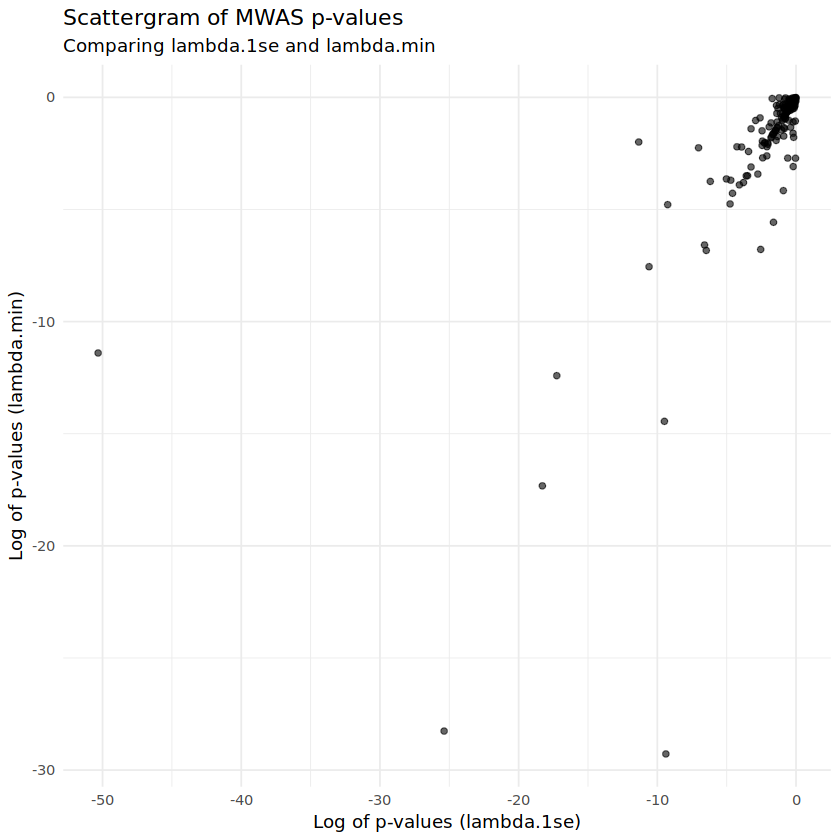

In [100]:
ggplot(df, aes(x = log(pval.lambda.1se), y = log(pval.lambda.min))) +
  geom_point(alpha = 0.6) +
  labs(x = "Log of p-values (lambda.1se)",
       y = "Log of p-values (lambda.min)",
       title = "Scattergram of MWAS p-values",
       subtitle = "Comparing lambda.1se and lambda.min") +
  theme_minimal()